In [1]:
!curl -L "https://app.roboflow.com/ds/T9nOGsPdnS?key=iNSAHdn1mM" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   889  100   889    0     0   1420      0 --:--:-- --:--:-- --:--:--  1420
100 11.0M  100 11.0M    0     0  10.8M      0  0:00:01  0:00:01 --:--:--  135M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: train/
   creating: train/imagery satellite with fire/
 extracting: train/imagery satellite with fire/100_jpg.rf.a3a550d42742b14118cea113c67246e6.jpg  
 extracting: train/imagery satellite with fire/100_jpg.rf.b7dd566e83a14cb44aa52373f939df07.jpg  
 extracting: train/imagery satellite with fire/100_jpg.rf.c8985e0ef36a8a9424d0742e4f1a881a.jpg  
 extracting: train/imagery satellite with fire/102_jpg.rf.ace98147e50af85161c77067640da6b8.jpg  
 extracting: train/imagery satellite with fire/102_jpg.rf.b75a591284bcc68fb1ed58c3dbbd59b6.jpg  
 extracting: train/imagery satellite with fire/102_jpg.rf.c942aa11ff5f

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "/content/train"

training_datagen = ImageDataGenerator(rescale=1./255,
																			zoom_range=0.15,
																			horizontal_flip=True,
                                      fill_mode='nearest')

VALIDATION_DIR = "/content/valid"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 56
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 7
)

Found 2250 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 18s 890ms/step - loss: 7.3184 - acc: 0.6811 - val_loss: 0.3652 - val_acc: 0.8163
Epoch 2/20
14/14 [==============================] - 10s 735ms/step - loss: 0.3618 - acc: 0.8712 - val_loss: 0.3081 - val_acc: 0.8367
Epoch 3/20
14/14 [==============================] - 10s 726ms/step - loss: 0.4325 - acc: 0.8176 - val_loss: 0.2547 - val_acc: 0.9286
Epoch 4/20
14/14 [==============================] - 10s 737ms/step - loss: 0.2791 - acc: 0.8943 - val_loss: 0.2301 - val_acc: 0.8673
Epoch 5/20
14/14 [==============================] - 10s 743ms/step - loss: 0.3486 - acc: 0.8801 - val_loss: 0.4236 - val_acc: 0.8163
Epoch 6/20
14/14 [==============================] - 10s 738ms/step - loss: 0.2898 - acc: 0.8890 - val_loss: 1.1840 - val_acc: 0.6837
Epoch 7/20
14/14 [==============================] - 10s 739ms/step - loss: 0.2652 - acc: 0.8992 - val_loss: 0.3809 - val_acc: 0.8367
Epoch 8/20
14/14 [==============================] - 10s 740ms/step - 

In [ ]:

for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

Epoch 1/10
14/14 [==============================] - 18s 852ms/step - loss: 0.3804 - acc: 0.8278 - val_loss: 0.1870 - val_acc: 0.9082
Epoch 2/10
14/14 [==============================] - 11s 749ms/step - loss: 0.3295 - acc: 0.8622 - val_loss: 0.2101 - val_acc: 0.9184
Epoch 3/10
14/14 [==============================] - 10s 745ms/step - loss: 0.2604 - acc: 0.8954 - val_loss: 0.1568 - val_acc: 0.9286
Epoch 4/10
14/14 [==============================] - 10s 738ms/step - loss: 0.2725 - acc: 0.9311 - val_loss: 0.1866 - val_acc: 0.9184
Epoch 5/10
14/14 [==============================] - 10s 744ms/step - loss: 0.2269 - acc: 0.9196 - val_loss: 0.2187 - val_acc: 0.9184
Epoch 6/10
14/14 [==============================] - 11s 755ms/step - loss: 0.2017 - acc: 0.9286 - val_loss: 0.1879 - val_acc: 0.9184
Epoch 7/10
14/14 [==============================] - 10s 737ms/step - loss: 0.2150 - acc: 0.9196 - val_loss: 0.2136 - val_acc: 0.9184
Epoch 8/10
14/14 [==============================] - 10s 727ms/step - 

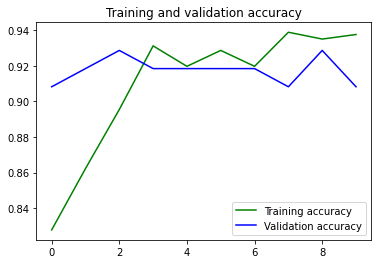

<Figure size 432x288 with 0 Axes>

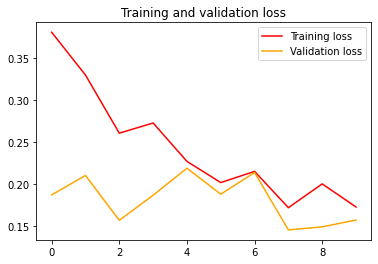

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
model.save("/content/inception.h5")
